<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - From a URL (github or otherwise)
 - CSV upload method
 - !wget method
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Data Imputation"
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot (if we have time)

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
! ls

--2019-09-07 17:27:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15240 (15K) [application/x-httpd-php]
Saving to: ‘flag.data’

flag.data           100%[===================>]  14.88K  --.-KB/s    in 0.07s   

2019-09-07 17:27:53 (213 KB/s) - ‘flag.data’ saved [15240/15240]

flag.data  sample_data


In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [0]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  40531      0 --:--:-- --:--:-- --:--:-- 40531
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [0]:
! curl 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names'

1. TItle: Flag database

2. Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America,

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Steps of Loading and Exploring a Dataset:

- Find a dataset that looks interesting
- Learn what you can about it 
 - What's in it? 
 - How many rows and columns? 
 - What types of variables?
- Look at the raw contents of the file
- Load it into your workspace (notebook)
 - Handle any challenges with headers
 - Handle any problems with missing values
- Then you can start to explore the data
 - Look at the summary statistics
 - Look at counts of different categories
 - Make some plots to look at the distribution of the data

## 3 ways of loading a dataset

### From its URL

In [0]:
import pandas as pd
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# column_headers = [ add these from site then add to next line]
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                  'occupation', 'relationship', 'race', 'sex', 'capital-gain',
                  'capital-loss','hours-per-week','native-country', 'income']
df = pd.read_csv(dataset_url, names=column_headers)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### From a local file

In [1]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult.data


In [7]:
import pandas as pd
df = pd.read_csv("adult.data", names=column_headers)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.shape

(32561, 15)

In [10]:
df.sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
24253,44,Private,68748,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,<=50K
4659,38,Private,111499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,50,United-States,>50K
25857,43,Private,393354,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,38,United-States,>50K
19766,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3535,18,Private,174732,HS-grad,9,Never-married,Other-service,Other-relative,Black,Male,0,0,36,United-States,<=50K
16126,50,Private,31621,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
27958,31,Private,241360,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
29238,41,Private,187802,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3036,71,Local-gov,365996,Bachelors,13,Widowed,Prof-specialty,Unmarried,White,Female,0,0,6,United-States,<=50K
21052,27,Private,321896,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Using the `!wget` command

In [11]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-09-07 21:07:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3.79M  7.37MB/s    in 0.5s    

2019-09-07 21:07:07 (7.37 MB/s) - ‘adult.data.1’ saved [3974305/3974305]



In [12]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data -O adult.data.2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3881k  100 3881k    0     0  4982k      0 --:--:-- --:--:-- --:--:-- 4975k
curl: (6) Could not resolve host: adult.data.2


In [14]:
df = pd.read_csv("adult.data", na_values="")
df.head(15)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Part 2 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [23]:
import numpy as np
df = pd.read_csv('adult.data', names=column_headers)
df=df.replace(" ?", np.NaN)
df.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Fill Missing Values

In [24]:
df.fillna('unknown')
df.head(15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [25]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [26]:
df.iloc[14]

age                                40
workclass                     Private
fnlwgt                         121772
education                   Assoc-voc
education-num                      11
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country                    NaN
income                           >50K
Name: 14, dtype: object

In [27]:
df['native-country'].iloc[13]

' United-States'

In [28]:
df.index

RangeIndex(start=0, stop=32561, step=1)

In [29]:
range(0,32561)

range(0, 32561)

In [30]:
df['age']

0        39
1        50
2        38
3        53
4        28
5        37
6        49
7        52
8        31
9        42
10       37
11       30
12       23
13       32
14       40
15       34
16       25
17       32
18       38
19       43
20       40
21       54
22       35
23       43
24       59
25       56
26       19
27       54
28       39
29       49
         ..
32531    30
32532    34
32533    54
32534    37
32535    22
32536    34
32537    30
32538    38
32539    71
32540    45
32541    41
32542    72
32543    45
32544    31
32545    39
32546    37
32547    43
32548    65
32549    43
32550    43
32551    32
32552    43
32553    32
32554    53
32555    22
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

In [31]:
df[['age', 'education']]

,age,education
0,39,Bachelors
1,50,Bachelors
2,38,HS-grad
3,53,11th
4,28,Bachelors
5,37,Masters
6,49,9th
7,52,HS-grad
8,31,Masters
9,42,Bachelors


In [35]:
df['native-country'] == ' India'

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11        True
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
32531    False
32532    False
32533    False
32534    False
32535    False
32536    False
32537    False
32538    False
32539    False
32540    False
32541    False
32542    False
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Name: native-country, Length: 32561, dtype: bool

In [34]:
df[df['native-country'] == ' India']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
892,28,Private,164170,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,India,<=50K
968,48,Private,164966,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1029,48,Self-emp-inc,138370,Masters,14,Married-spouse-absent,Sales,Not-in-family,Asian-Pac-Islander,Male,0,0,50,India,<=50K
1095,22,Self-emp-not-inc,361280,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,20,India,<=50K
1327,52,Private,168381,HS-grad,9,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
2130,28,State-gov,130620,11th,7,Separated,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,<=50K
2558,58,State-gov,110517,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,4064,0,40,India,<=50K
2989,44,Private,178385,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,48,India,<=50K
4480,30,Private,302149,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,40,India,<=50K


In [38]:
df[(df['native-country']==' India') & (df['education']== ' Bachelors')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1095,22,Self-emp-not-inc,361280,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,20,India,<=50K
4480,30,Private,302149,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,40,India,<=50K
4512,29,Private,193260,Bachelors,13,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,30,India,<=50K
4523,57,Local-gov,148509,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,35,India,<=50K
10107,31,Private,341672,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,60,India,<=50K
11835,38,Private,167725,Bachelors,13,Married-spouse-absent,Transport-moving,Not-in-family,Other,Male,0,0,84,India,<=50K
13422,53,Private,366957,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,50,India,>50K
13862,45,Private,209912,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


# Part 3 - Explore the Dataset:

In [39]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [40]:
df.iloc[14]

age                                40
workclass                     Private
fnlwgt                         121772
education                   Assoc-voc
education-num                      11
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country                    NaN
income                           >50K
Name: 14, dtype: object

In [41]:
df['native-country'].iloc[12]

' United-States'

In [42]:
df.index

RangeIndex(start=0, stop=32561, step=1)

In [43]:
range(0,32561)

range(0, 32561)

In [44]:
df['age']

0        39
1        50
2        38
3        53
4        28
5        37
6        49
7        52
8        31
9        42
10       37
11       30
12       23
13       32
14       40
15       34
16       25
17       32
18       38
19       43
20       40
21       54
22       35
23       43
24       59
25       56
26       19
27       54
28       39
29       49
         ..
32531    30
32532    34
32533    54
32534    37
32535    22
32536    34
32537    30
32538    38
32539    71
32540    45
32541    41
32542    72
32543    45
32544    31
32545    39
32546    37
32547    43
32548    65
32549    43
32550    43
32551    32
32552    43
32553    32
32554    53
32555    22
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

In [45]:
df[['age', 'education']]

,age,education
0,39,Bachelors
1,50,Bachelors
2,38,HS-grad
3,53,11th
4,28,Bachelors
5,37,Masters
6,49,9th
7,52,HS-grad
8,31,Masters
9,42,Bachelors


In [46]:
# Get all people from India by:
df[df['native-country'] == ' India']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
892,28,Private,164170,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,India,<=50K
968,48,Private,164966,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1029,48,Self-emp-inc,138370,Masters,14,Married-spouse-absent,Sales,Not-in-family,Asian-Pac-Islander,Male,0,0,50,India,<=50K
1095,22,Self-emp-not-inc,361280,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,20,India,<=50K
1327,52,Private,168381,HS-grad,9,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
2130,28,State-gov,130620,11th,7,Separated,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,<=50K
2558,58,State-gov,110517,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,4064,0,40,India,<=50K
2989,44,Private,178385,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,48,India,<=50K
4480,30,Private,302149,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,40,India,<=50K


In [52]:
df[(df['education'] == ' Bachelors') & (df['native-country'] == ' India')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1095,22,Self-emp-not-inc,361280,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,20,India,<=50K
4480,30,Private,302149,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,40,India,<=50K
4512,29,Private,193260,Bachelors,13,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,30,India,<=50K
4523,57,Local-gov,148509,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,35,India,<=50K
10107,31,Private,341672,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,60,India,<=50K
11835,38,Private,167725,Bachelors,13,Married-spouse-absent,Transport-moving,Not-in-family,Other,Male,0,0,84,India,<=50K
13422,53,Private,366957,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,50,India,>50K
13862,45,Private,209912,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [65]:
df[df['native-country'] ==' India'].shape

(100, 15)

In [57]:
import numpy as np

df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [60]:
len(df[df['native-country']==' India'])

100

In [70]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

## Look at "Summary Statistics

### Numeric

In [71]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [73]:
df.describe(percentiles=[.1, .2, .3, .95])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
10%,22.000000,6.571600e+04,7.000000,0.000000,0.000000,24.000000
20%,26.000000,1.066480e+05,9.000000,0.000000,0.000000,35.000000
30%,30.000000,1.308560e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
95%,63.000000,3.796820e+05,14.000000,5013.000000,0.000000,60.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [74]:
df.describe(exclude="number")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [76]:
df.describe(exclude="number").T  # transpose DF, organizes it vertically

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,31978,41,United-States,29170
income,32561,2,<=50K,24720


In [78]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [80]:
df['marital-status'].value_counts(normalize=True) # normalizes it, it divides all numbers by size of dataset

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

###Non-Numeric

In [75]:
df.describe(exclude="number")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Look at Categorical Values

# Part 4 - Basic Visualizations (using the Pandas Library)

## Histogram

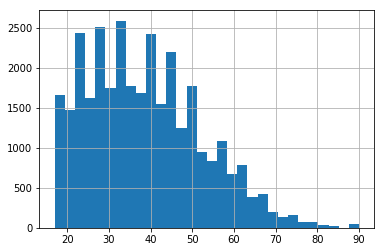

In [81]:
# Pandas Histogram 
df['age'].hist(bins=30)

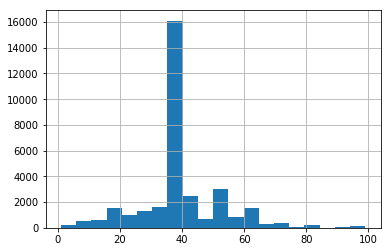

In [82]:
df['hours-per-week'].hist(bins=20)

## Density Plot (KDE)

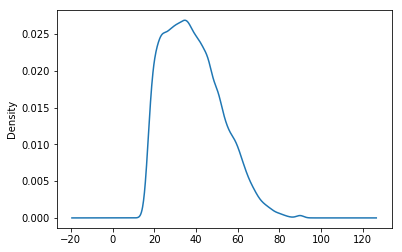

In [83]:
# Pandas Density Plot
df['age'].plot.density()

## Scatter Plot

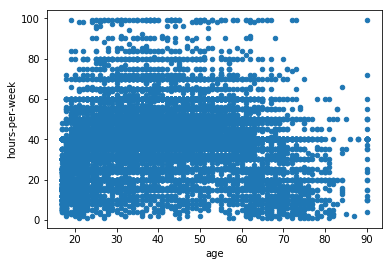

In [84]:
# Pandas Scatterplot
df.plot.scatter('age', 'hours-per-week')

In [100]:
bike_data_url = "https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv"
df = pd.read_csv(bike_data_url, 
                 encoding='latin1',
                sep=';',
                parse_dates = ['Date'],
                dayfirst = True,
                index_col = 'Date')
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [0]:
# Bonus dataset
# https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv
bike_data_url = "https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv"
df = pd.read_csv(bike_data_url,
                 encoding='latin1',
                 sep=';',
                parse_dates=['Date'],
                dayfirst=True,
                index_col='Date')

In [102]:
df.head(3)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [107]:
# libray Unidecode 1.1.1 - allows us to convert different encodings
# ! pip install unidecode
!pip install unidecode

In [104]:
df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [105]:
df.head(3)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [106]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [108]:
df.columns

Index(['Berri 1', 'Brébeuf (données non disponibles)', 'Côte-Sainte-Catherine',
       'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1',
       'St-Urbain (données non disponibles)'],
      dtype='object')

In [111]:
import unidecode
unidecode.unidecode("Côte-Sainte-Catherine")

'Cote-Sainte-Catherine'

In [112]:
unidecode.unidecode("Brebuf").lower()

'brebuf'

In [113]:
# on multiple strings using list comprehension
list_1 = [10, 20, 30]
# want to create a list # 2 and divide all numbers in list 1 by 10
# could do by loop
list_2 = []
for i in list_1: 
  list_2.append(i//10)
list_2

[1, 2, 3]

In [0]:
# But can be done quicker in less lines
list_2 = [i//10 for i in list_1]

In [115]:
list_2

[1, 2, 3]

In [0]:
# for every item in firstl ist, i want to get an item division by 10 in list2

In [117]:

new_cols = [unidecode.unidecode(col).lower() for col in df.columns]
new_cols

['berri 1',
 'brebeuf (donnees non disponibles)',
 'cote-sainte-catherine',
 'maisonneuve 1',
 'maisonneuve 2',
 'du parc',
 'pierre-dupuy',
 'rachel1',
 'st-urbain (donnees non disponibles)']

In [118]:
df.columns = new_cols
df.head()

,berri 1,brebeuf (donnees non disponibles),cote-sainte-catherine,maisonneuve 1,maisonneuve 2,du parc,pierre-dupuy,rachel1,st-urbain (donnees non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [119]:
df['berri 1']

# 2 ways to acces scolumns in pandas
# df.rachell or df['rachell']
# Prefers with df[], easier to spot and cant use mult with variables that have mult


Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

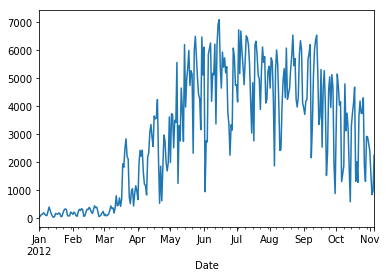

In [120]:
# Lets plot the data
df['berri 1'].plot() 

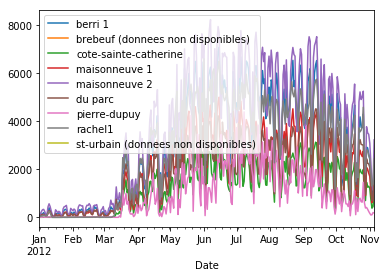

In [121]:
df.plot() # looks at entire data set

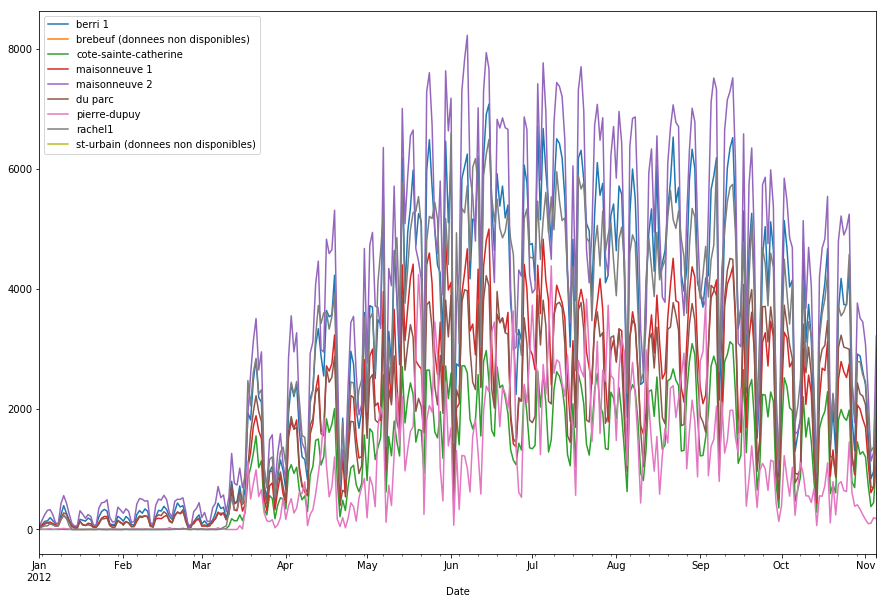

In [122]:
df.plot(figsize=(15,10)) # makes it bigger

In [0]:
df.tail()

In [0]:
# change color scheme
import matplotlib.pyplot as plt
plt.style.use('ggplot')

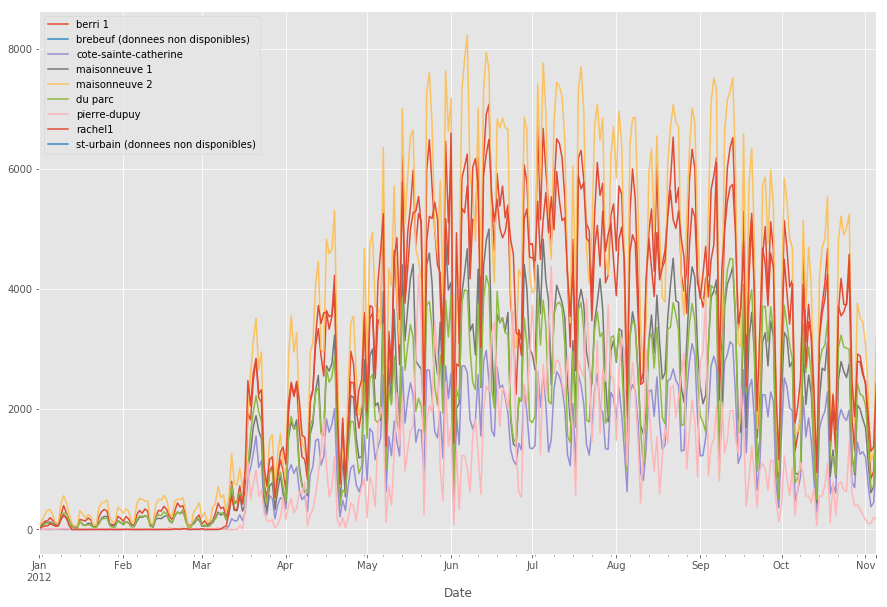

In [124]:
df.plot(figsize=(15,10))

In [0]:
# search for matplot lib styles to get different styles


In [0]:
# can use sebonr
plt.style.use('seaborn')

In [0]:
import pandas as pd
import numpy as np
import requests

In [0]:
r = requests.get('https://cat-fact.herokuapp.com/facts')

In [0]:
json_data = r.json()

In [138]:
type(json_data)

dict

In [148]:
dict_key(['all'])

NameError: ignored

In [145]:
json_data['all']

[{'_id': '591d9bb2227c1a0020d26826',
  'text': 'The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.',
  'type': 'cat',
  'upvotes': 9,
  'user': {'_id': '587288f6e6f85e64ae1c7ef7',
   'name': {'first': 'Alex', 'last': 'Wohlbruck'}},
  'userUpvoted': None},
 {'_id': '58e0086f0aac31001185ed02',
  'text': "Cats can't taste sweetness.",
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '58e007480aac31001185ecef',
   'name': {'first': 'Kasimir', 'last': 'Schulz'}},
  'userUpvoted': None},
 {'_id': '588e746706ac2b00110e59ff',
  'text': 'Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.',
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '588e6e8806ac2b00110e59c3',
   'name': {'first': 'Thomas', 'last': 'Lockwood'}},
  'userUpvoted': None},
 {'_id': '5b1b40d4841d9700146158d8',
  'text': 'Koko the gorilla got a pet cat for her birthday in 1985 after she requested to have one as a birthday

In [140]:
json_data.keys()

dict_keys(['all'])

In [141]:
len(json_data['all'])

227

In [0]:
res = json_data['all']

In [150]:
res[:3]

[{'_id': '591d9bb2227c1a0020d26826',
  'text': 'The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.',
  'type': 'cat',
  'upvotes': 9,
  'user': {'_id': '587288f6e6f85e64ae1c7ef7',
   'name': {'first': 'Alex', 'last': 'Wohlbruck'}},
  'userUpvoted': None},
 {'_id': '58e0086f0aac31001185ed02',
  'text': "Cats can't taste sweetness.",
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '58e007480aac31001185ecef',
   'name': {'first': 'Kasimir', 'last': 'Schulz'}},
  'userUpvoted': None},
 {'_id': '588e746706ac2b00110e59ff',
  'text': 'Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.',
  'type': 'cat',
  'upvotes': 8,
  'user': {'_id': '588e6e8806ac2b00110e59c3',
   'name': {'first': 'Thomas', 'last': 'Lockwood'}},
  'userUpvoted': None}]

In [151]:
for i in res[:3]:
  print(i['user']['name']['first'],':', i['text'])

Alex : The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.
Kasimir : Cats can't taste sweetness.
Thomas : Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.


In [152]:
# better way  use f strings
for i in res[:3]:
  print(f"{i['user']['name']['first']} {i['user']['name']['last']}: {i['text']}")

Alex Wohlbruck: The CIA spent US$20 million in the 60s training cats to spy on the Soviets. The first spy cat was hit by a taxi.
Kasimir Schulz: Cats can't taste sweetness.
Thomas Lockwood: Domestic cats spend about 70 percent of the day sleeping. And 15 percent of the day grooming.


In [153]:
d = {"a": [1,2,3], "b": [4,5,6]}
pd.DataFrame(d)

,a,b
0,1,4
1,2,5
2,3,6


In [154]:
d = {"test": [...], "username":[...], "upvotes": []}
pd.DataFrame(d)

ValueError: ignored